# Part C: Coding

In [7]:
!pip install monashspa

In [23]:
# PHS1011 - Introduction to python - Part C
# Testing new skills
# Chloe Skipworth, 14th March 2025
# TA: Alex

import numpy as np
import matplotlib.pyplot as plt
import monashspa.PHS1011 as spa

array = np.array([1,2,3,4])
print(array)
print(2*array,'\n')

table = np.array([
    [1,2,3,4],
    [5,6,7,8],
    [9,10,11,12],
    [13,14,15,16],
    [17,18,19,20]
])

print(table[3,1])
print(table[:,0])
print(table[:,1:3])
print(table[[0,1,4],:])
print(np.delete(table, [2,3], axis=0))

[1 2 3 4]
[2 4 6 8] 

14
[ 1  5  9 13 17]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]
 [18 19]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [17 18 19 20]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [17 18 19 20]]


# Part D: Analysing

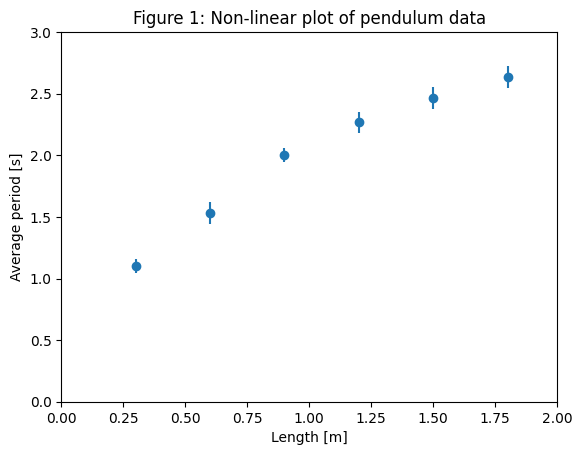

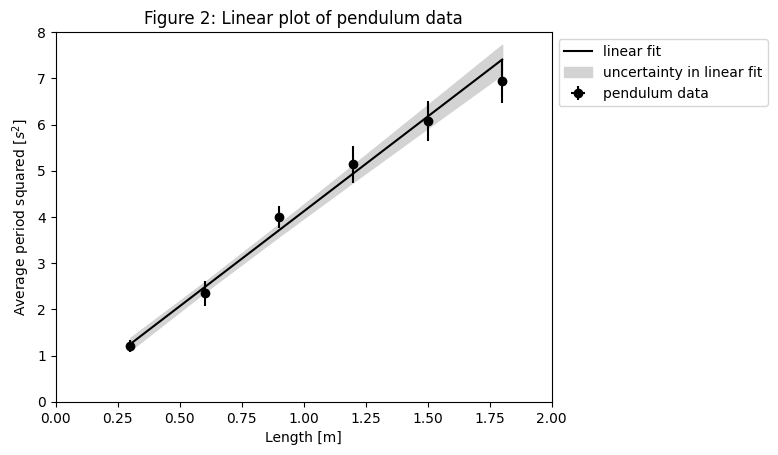

Measurement of gravitational acceleration: g = 9.6147993911773  +/-  0.5176738357620143 m/s^2


In [60]:
# PHS1011 - Introduction to Python - Part D
# Using a pendulum to measure the gravitational constant
# Chloe Skipworth, 14th March 2025

import numpy as np
import matplotlib.pyplot as plt
import monashspa.PHS1011 as spa

data = [
    #length[m], u(length)[m], period1[s], period2[s], period3[s]
    [0.300, 0.003, 1.2, 1.0, 1.1],
    [0.600, 0.003, 1.4, 1.5, 1.7],
    [0.900, 0.003, 2.0, 2.1, 1.9],
    [1.200, 0.003, 2.4, 2.1, 2.3],
    [1.500, 0.003, 2.3, 2.6, 2.5],
    [1.800, 0.003, 2.6, 2.5, 2.8]
]

# turn data list into an array
data = np.array(data)

# extract the one-dimensional array for the lengths
length = data[:,0]
# extract the one-dimensional array for the uncertainty in lengths
u_length = data[:,1]
# extract the three columns of period measurements into a separate array
period_data = data[:,2:5]
# calculate the one-dimensional array of average periods across the three trials
avg_period = np.mean(period_data,axis=1)
# calculate the one-dimensional array of uncertainty in the average periods
u_avg_period = np.std(period_data, axis=1, ddof=1)/np.sqrt(3)

# plotting the graph of raw experimental data
plt.figure(1)
plt.title("Figure 1: Non-linear plot of pendulum data")
plt.errorbar(length, avg_period,xerr=u_length, yerr=u_avg_period, marker="o", linestyle="None")
plt.xlabel("Length [m]")
plt.ylabel("Average period [s]")
plt.xlim([0,2])
plt.ylim([0,3])
spa.savefig('figure1.png')
plt.show()

print()

# linearising the data by taking the square of the average period
avg_period_sq = avg_period**2
u_avg_period_sq = 2*avg_period*u_avg_period

# determining the line of best fit
fit_results = spa.linear_fit(length, avg_period_sq, u_y=u_avg_period_sq)
y_fit = fit_results.best_fit
u_y_fit = fit_results.eval_uncertainty(sigma=1)

# plotting the graph of linearised experimental data
plt.figure(2)
plt.title("Figure 2: Linear plot of pendulum data")
plt.errorbar(length, avg_period_sq ,xerr=u_length, yerr=u_avg_period_sq, marker="o", linestyle="None", color="black", label="pendulum data")
plt.plot(length, y_fit, marker="None", linestyle="-", color="black", label="linear fit")
plt.fill_between(length, y_fit-u_y_fit, y_fit+u_y_fit, color="lightgrey", label="uncertainty in linear fit")
plt.xlabel("Length [m]")
plt.ylabel("Average period squared [$s^{2}$]")
plt.xlim([0,2])
plt.ylim([0,8])
plt.legend(bbox_to_anchor=(1,1))
spa.savefig('figure2.png')
plt.show()

# calculating g
fit_parameters = spa.get_fit_parameters(fit_results)
gradient = fit_parameters["slope"]
u_gradient = fit_parameters["u_slope"]
measured_g = 4*np.pi**2/gradient
u_measured_g = 4*np.pi**2*u_gradient/(gradient**2)
print("Measurement of gravitational acceleration: g =", measured_g, " +/- ", u_measured_g,"m/s^2")




